# Riddler Classic - [September 21, 2019](https://fivethirtyeight.com/features/can-you-win-the-tour-de-fivethirtyeight/)

## Problem
_You are the coach for Team Riddler at the Tour de FiveThirtyEight, where there are 20 teams (including yours). Your objective is to win the Team Time Trial race, which has the following rules:_

- _Each team rides as a group throughout the course at some fixed pace, specified by that team’s coach. Teams that can’t maintain their pace are said to have “cracked,” and don’t finish the course._
- _The team that finishes the course with the fastest pace is declared the winner._
- _Teams ride the course one at a time. After each team completes its attempt, the next team quickly consults with its coach (who assigns a pace) and then begins its ride. Coaches are aware of the results of all previous teams when choosing their own team’s pace._

_Assume that all teams are of equal ability: At any given pace, they have the exact same probability of cracking, and the faster the pace, the greater the probability of cracking. Teams’ chances of cracking are independent, and each team’s coach knows exactly what a team’s chances of cracking are for each pace._

_Team Riddler is the first team to attempt the course. To maximize your chances of winning, what’s the probability that your team will finish the course? What’s the probability you’ll ultimately win?_

_Extra Credit: If Team Riddler is the last team to attempt the course (rather than the first), what are its chances of victory?_

## Solution
OK, first let's wrap our head around this problem. We are the first team to go and we want to maximize our chances of winning knowing that if we successfully complete the course at a give pace, all the other teams will choose an pace that's slightly faster and arbitrarly close to our completion pace. For that reason, our calculation will have each subsequent team attempting to match our pace with the idea being that they could select a pace that's slightly faster but basically equal. So the probablity that Team Riddler wins is the probability that (1) we complete the course, and (2) none of the other teams complete the course. 

$$\Pr(W)=\Pr(c_1)\cdot\Pr(\lnot c_2)\cdot\Pr(\lnot c_3)\cdot\ldots\cdot\Pr(\lnot c_{20}) \\ \text{where $c_i$ is the event in which team i completes the course}$$

Let the probability that we complete the course $\Pr(c_1)=p$. Again, if we successfully complete the course, each other team will pick a pace that's slightly faster but virtually equal to our pace.  Therefore we can assume that if we successfully complete the course, each other team will approximately match our pace.  As a result, the probability that all the other teams DO NOT successfully complete the course is $\Pr(\lnot c_i)=1-p$.  Now we can rewrite the probability of winning as follows.

$$\Pr(W)=p\cdot(1-p)^{19}$$

Now we simply need to find the maximum of the above equation.  WE can do this using good ol' calculus.  Take the derivative, set it to zero, and verify that the root we found was a the global maximum. The derivative yields

$$0=(1-20x)(1-x)^{18} \\ \text{which has roots at } x=0.05 \text{ and } x=1$$

Graphing the our original equation, we can easily verify that the maximum occurs at $x=0.05$.

In [3]:
import numpy as np  
import matplotlib.pyplot as plt  
def graph(formula, x_range):  
    x = np.array(x_range)  
    y = eval(formula)
    plt.plot(x, y)  
    plt.show()

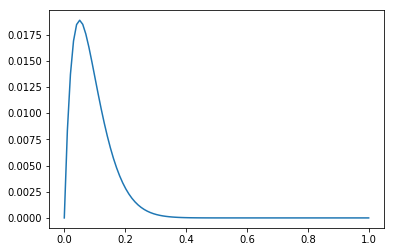

In [7]:
graph('x*(1-x)**19', np.linspace(0,1,100))

So the probability that we will finish the course is 5% which, after plugging this back into our equation, yields a 1.89% probability of winning the race.  

In [8]:
x=.05
x*(1-x)**19

0.018867680126765363

## Extra Credit

Now then, the extra credit is where things really get interesting. The difficult part here is that in the last position, Team Riddler's chances of winning are going to depend on which teams in the race successfully completed the course. To illustrate this, image first that Team Riddler is the second team to go. One of two things can happen. Either team 1 suggestfully finishes the course or the don't. In the event that they do, Team Riddler will simply match the first team's pace (but slightly faster). In the likely event that Team 1 fails to complete the course, Teams Riddler can now pick whichever pace they like they and would be wise to optimize their pace in much the same way they did when they were the first to race :)

More explicitly, Team Riddler's probability to winning (if they're going second) is 

$$\Pr(W)=\Pr(c_1)\cdot\Pr(c_2)\cdot\Pr(\lnot c_3)\cdot\ldots\cdot\Pr(\lnot c_{20}) + \\ \Pr(\lnot c_1)\cdot\Pr(c_2)\cdot\Pr(\lnot c_3)\cdot\ldots\cdot\Pr(\lnot c_{20})$$

If team 1 completes the course, all the other teams will have to attempt to complete the race at the pace set by team 1. Let's call their pace (described in terms of the likelihood they complete the course) as 

$$\Pr(c_1)=p_1$$

If team 1 doesn't complete the course, Team Riddler can set their own optimal pace.  Using the same procedure we used for the first part of the question, we just need to find the maximum of 

$$\Pr(W)=\Pr(c_2)\cdot\Pr(\lnot c_3)\cdot\ldots\cdot\Pr(\lnot c_{20}) = p_2*(1-p_2)^{18}$$

As you've probably already noticed, the optimal pace for any given team $i$ (assuming all the teams before them didn't complete the course) is given by

$$\Pr(W_i)=p_i*(1-p_i)^{20-i}$$

which always yields the same derivative

$$0=(1-21p_i+ip_i)(1-p_i)^{19-i}$$

and always has its maximum root at 

$$p_i=\frac{1}{21-i}$$

Now we're equipped to determine the probability of winning if Team Riddler is the last to race.  We need to account for all of the different paces that Team Riddler might have to attempt to beat and the corresponding probabilities of that event occuring.  Thankfully, out task will be simplified by the fact that the pace of the race is completely dictacted once a simple team has completed the course. After than point, each subequent team's optimal strategy is to attempt to complete the course at a slightly faster rate (equal for the sake of how we're treating this problem).  So there are 20 different paces Team Riddler might have to attempt to complete the race at.  

$$p_1=\frac{1}{20} \text{ if team 1 is the first to complete}$$
$$p_2=\frac{1}{19} \text{ if team 2 is the first to complete}$$
$$\cdots$$
$$p_{19}=\frac{1}{2} \text{ if team 19 is the first to complete}$$
$$p_{20}=\frac{1}{1} \text{ if team 20 is the first to complete}$$

The probability of each of those paces being the pace that dictates Team Riddler's pace is (T_i is the event where team i sets the pace)

$$\Pr(T_1)=p_1$$
$$\Pr(T_2)=(1-p_1)p_2$$
$$\Pr(T_3)=(1-p_1)(1-p_2)p_3$$
$$\cdots$$
$$\Pr(T_{20})=p_{20}\prod_{i=1}^{19} (1-p_i)$$

So the probability of Team Riddler winning is 

$$\Pr(W)=\Pr(c_{20}|p_1)\Pr(T_1) + \Pr(c_{20}|p_2)\Pr(T_2) + \cdots + \Pr(c_{20}|p_{20})\Pr(T_{20})$$

In [9]:
import sympy